In [1]:
# Import libraries

#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
from matplotlib import pyplot as plt
from kaggle_olympic_games_medals import KaggleOlympicGamesMedals


In [2]:
data_dir = '../data/kaggle/olympic-games-medals'

ogm = KaggleOlympicGamesMedals(data_dir)


Data Loaded


## Explore the raw data and determine which datasets to use

### Hosts Dataset

In [3]:
df_hosts = ogm.get_hosts()
ogm.explore_data(df_hosts)
# This is a list of all of the host countries for each olympic games
# This will be used to merge with other datasets but need to clean it and add host country codes

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   game_slug        53 non-null     object
 1   game_end_date    53 non-null     object
 2   game_start_date  53 non-null     object
 3   game_location    53 non-null     object
 4   game_name        53 non-null     object
 5   game_season      53 non-null     object
 6   game_year        53 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.0+ KB
None

-- Missing Info --
game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


### Medals Dataset

In [4]:
df_medals = ogm.get_medals()
ogm.explore_data(df_medals)
# This is a list of all of the medals awarded for each event in each olympic games
# This will be one of our primary datasets.
# Note: the data contains duplicates by country for events with multiple athletes
# It needs to be cleaned and de-duped to get the medal counts by country
# Also may need to aggregate medal counts for the various country codes for Germany and Russia for a better overall comparison.

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       21697 non-null  object
 1   slug_game              21697 non-null  object
 2   event_title            21697 non-null  object
 3   event_gender           21697 non-null  object
 4   medal_type             21697 non-null  object
 5   participant_type       21697 non-null  object
 6   participant_title      6584 non-null   object
 7   athlete_url            17027 non-null  object
 8   athlete_full_name      18073 non-null  object
 9   country_name           21697 non-null  object
 10  country_code           20195 non-null  object
 11  country_3_letter_code  21697 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB
None

-- Missing Info --
discipline_title             0
slug_game                    0
event_title                  0
event_g

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [5]:
# Get medals by country
# Note: the data contains duplicates by country for events with multiple athletes
df_medals_country = ogm.get_medals_by_country()
ogm.explore_data(df_medals_country)

-- Info --
<class 'pandas.core.frame.DataFrame'>
Index: 20124 entries, 0 to 21696
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       20124 non-null  object
 1   slug_game              20124 non-null  object
 2   event_title            20124 non-null  object
 3   event_gender           20124 non-null  object
 4   medal_type             20124 non-null  object
 5   participant_type       20124 non-null  object
 6   country_name           20124 non-null  object
 7   country_3_letter_code  20124 non-null  object
 8   game_end_date          20124 non-null  object
 9   game_start_date        20124 non-null  object
 10  game_location          20124 non-null  object
 11  game_name              20124 non-null  object
 12  game_season            20124 non-null  object
 13  game_year              20124 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 2.3+ MB
None

-- Missing I

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,ITA,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,NOR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,SWE,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,GBR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
7,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,JPN,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


### Results Dataset

In [6]:
df_results = ogm.get_results()
ogm.explore_data(df_results)
# This is an expanded version of the medal dataset that includes all results, not just medals, for each event in each olympic games.
# This may be interesting to look at for an analysis of the 4th place finishers by country and event.

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   discipline_title       162804 non-null  object
 1   event_title            162804 non-null  object
 2   slug_game              162804 non-null  object
 3   participant_type       162804 non-null  object
 4   medal_type             20206 non-null   object
 5   athletes               7976 non-null    object
 6   rank_equal             32526 non-null   object
 7   rank_position          158926 non-null  object
 8   country_name           162804 non-null  object
 9   country_code           157768 non-null  object
 10  country_3_letter_code  162804 non-null  object
 11  athlete_url            129991 non-null  object
 12  athlete_full_name      141646 non-null  object
 13  value_unit             78646 non-null   object
 14  value_type             90049 non-null   o

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


### Athletes Dataset

In [7]:
df_athletes = ogm.get_athletes()
ogm.explore_data(df_athletes)
# This is a list of all of the athletes in each olympic games
# Not sure if this is a good dataset to use for analysis.

-- Info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB
None

-- Missing Info --
athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64


,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


## Medals Dataset Clean and Merge


The medals dataset contains two different rows for both winners in a team competition that consists of two persons, but it is one medal in total. For example, you can check the Tennis Doubles Men competition. Split the dataset into parts, group those team competitions, and join data again.

In [8]:
data_medal = ogm.get_medals_by_std_country_name()
data_medal.head()


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,ITA,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,NOR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,SWE,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,GBR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
7,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,JPN,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


## Timeline of disciplines contested at the Summer Olympic Games, 1896-2020

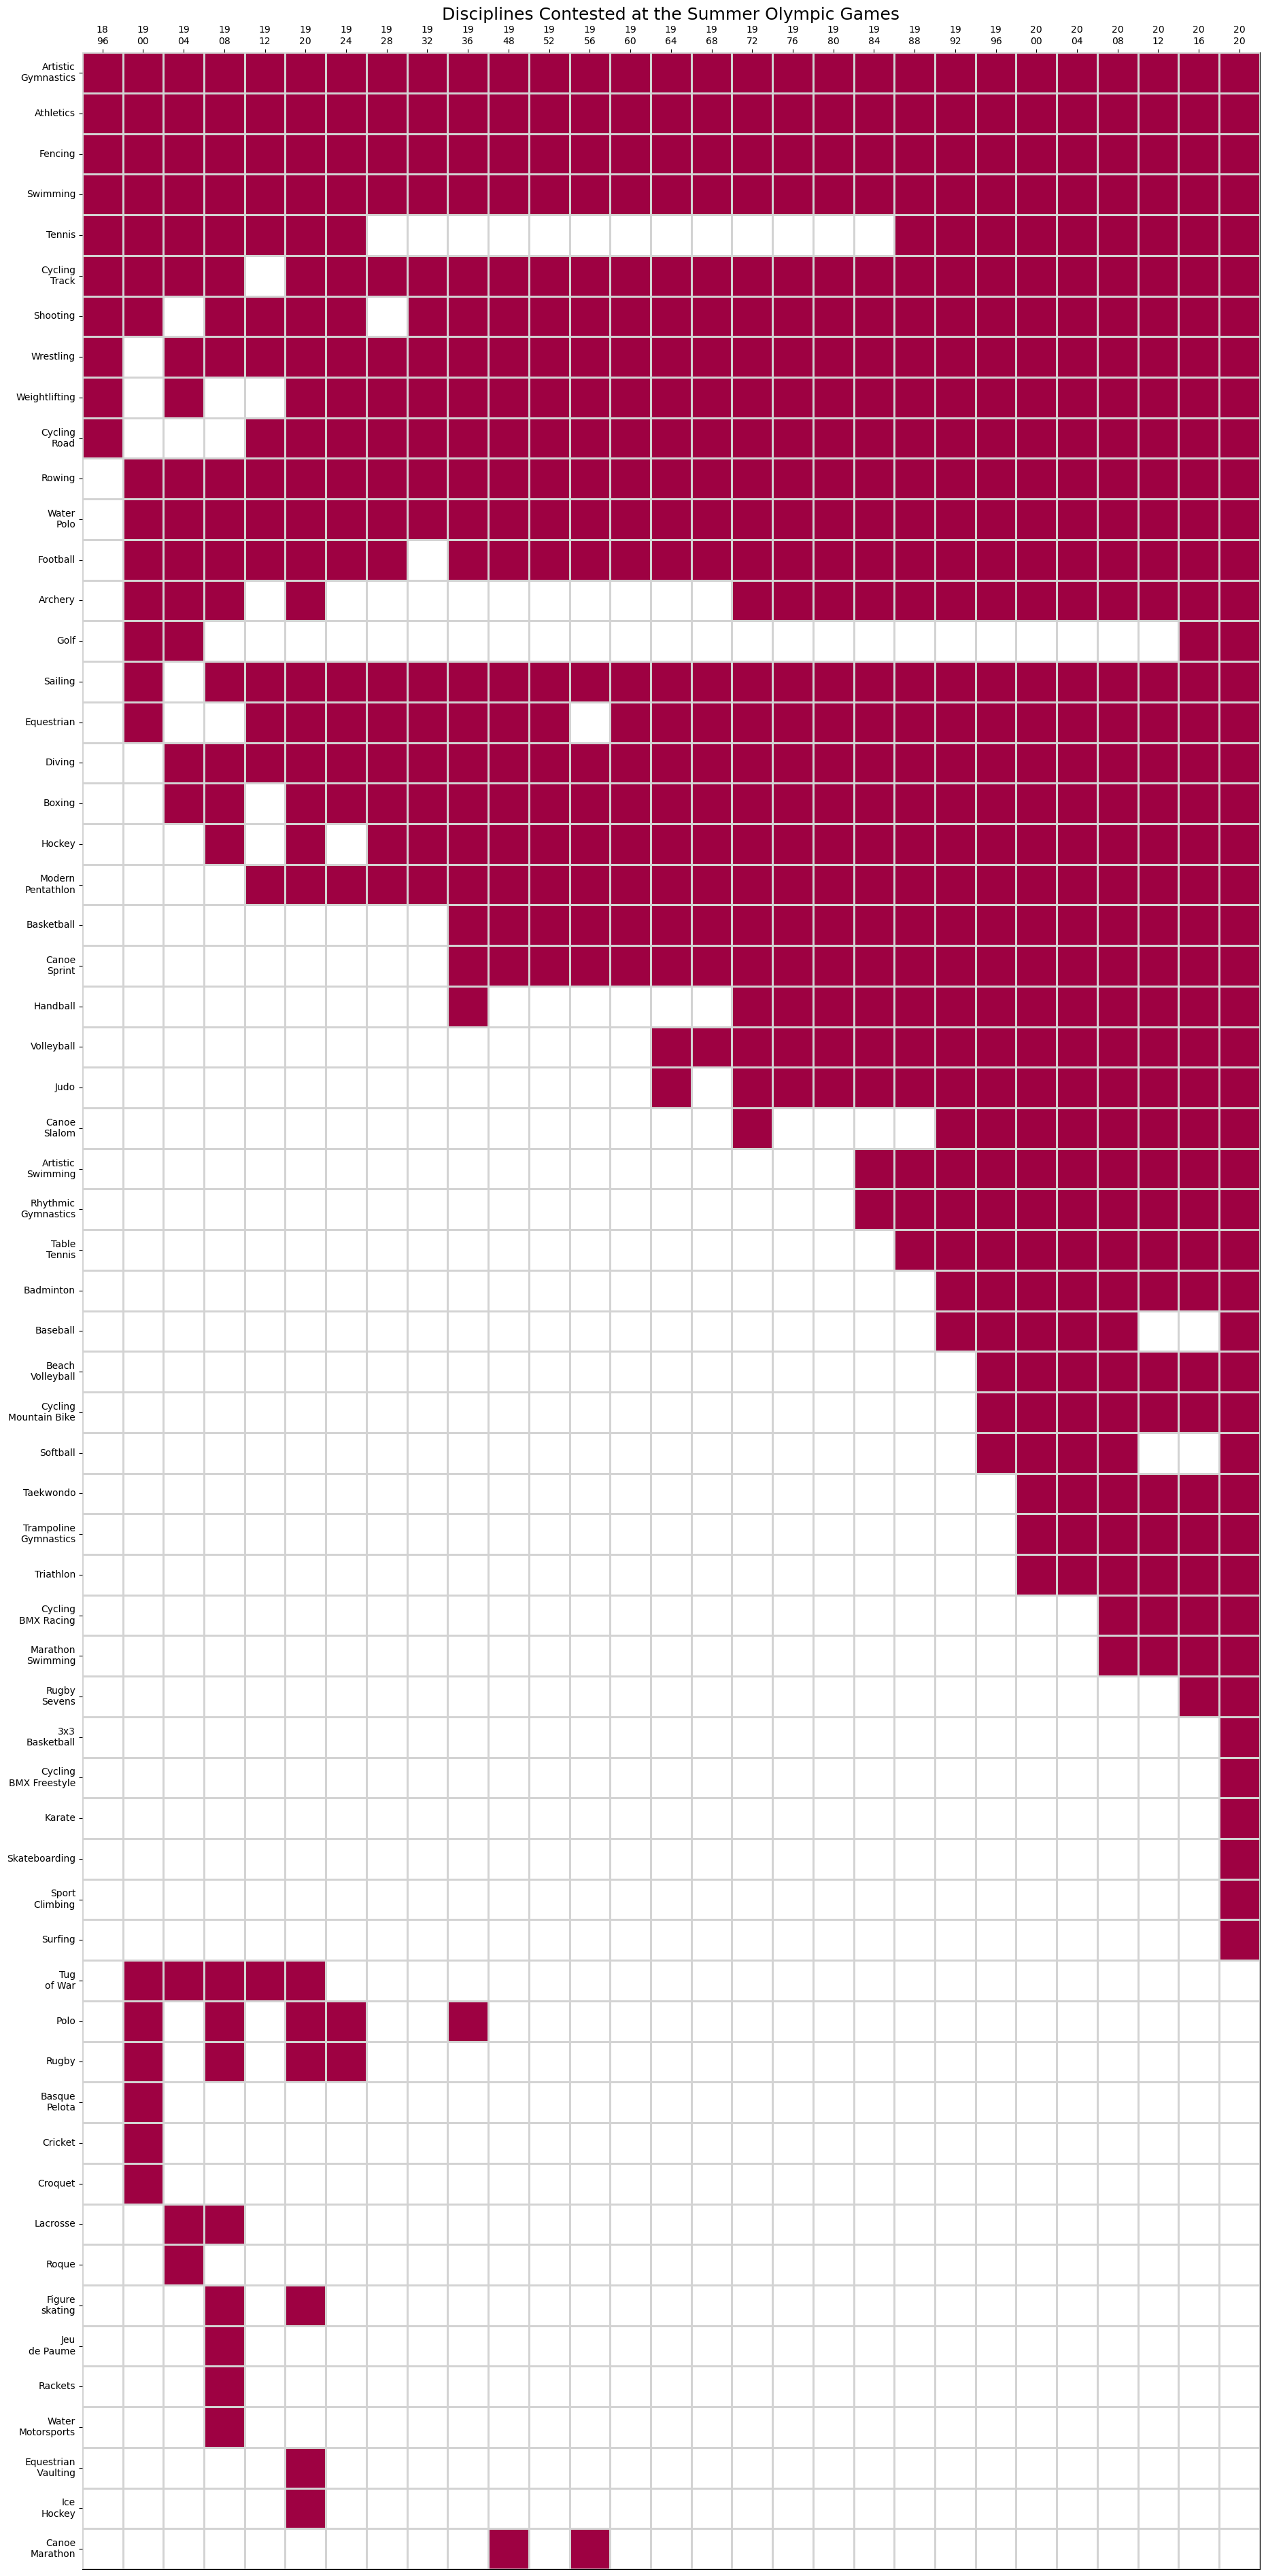

In [9]:
season = 'Summer'
disciplines = ogm.get_discipline_game_heatmap(data_medal, season)
ogm.plot_discipline_games_heatmap(disciplines, title=season, size=(20, 38))

## Timeline of disciplines contested at the Winter Olympic Games, 1924-2018

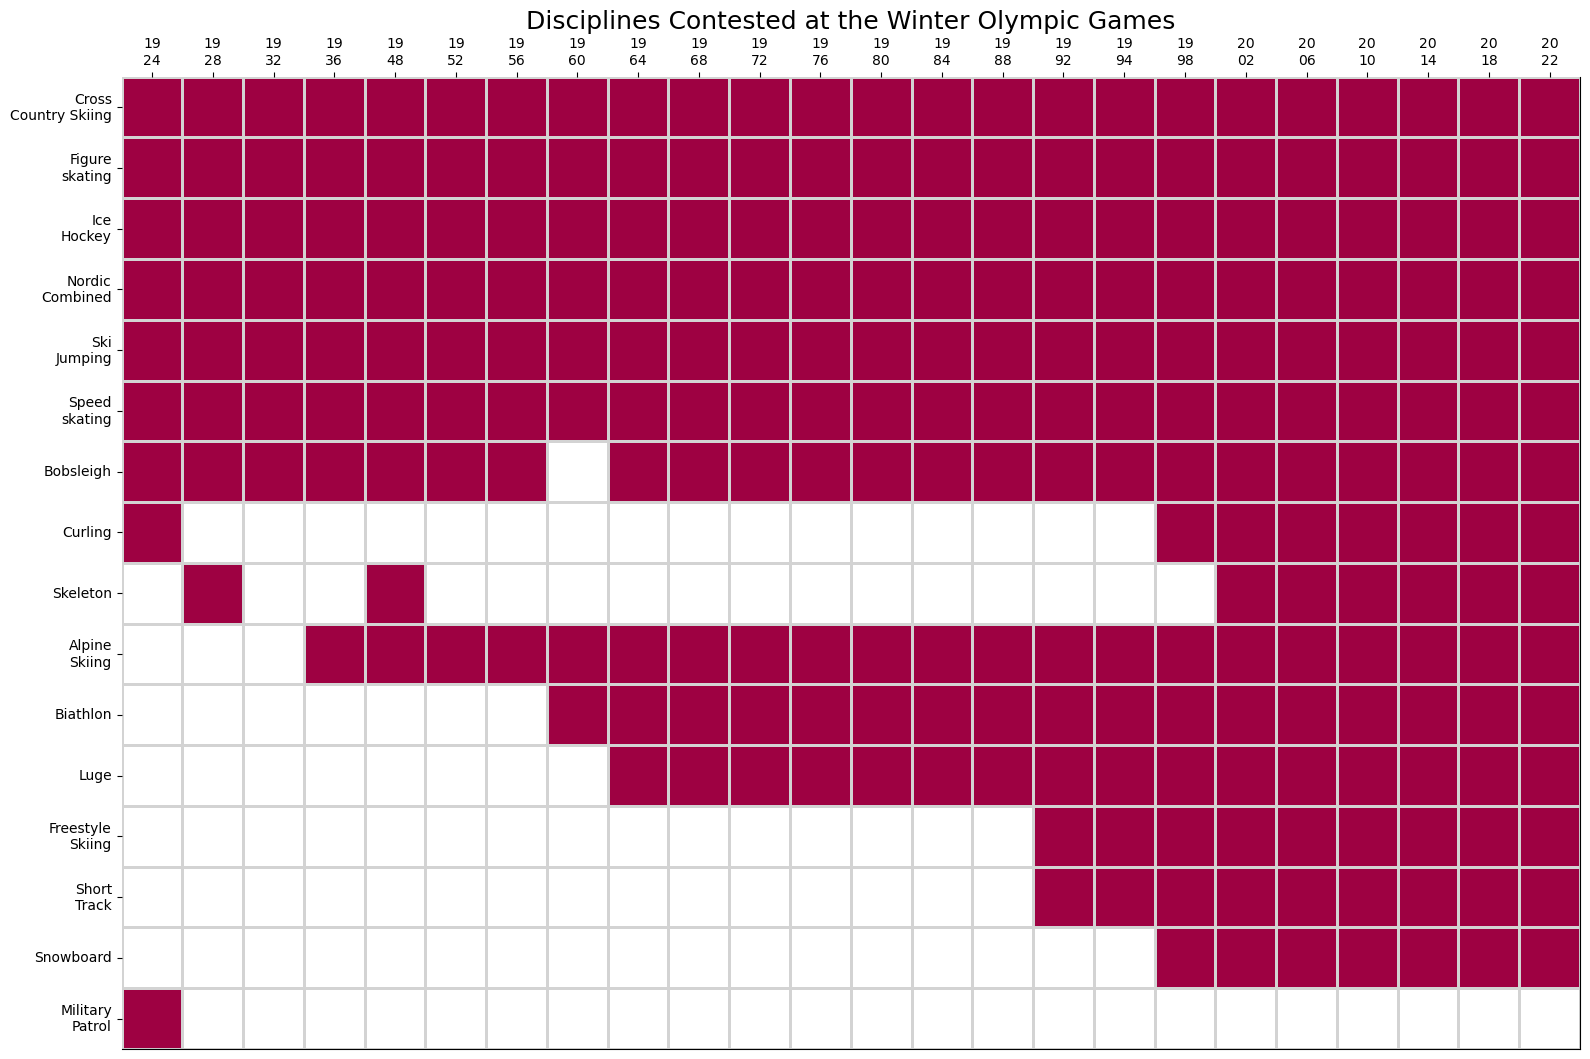

In [10]:
season = 'Winter'
disciplines = ogm.get_discipline_game_heatmap(data_medal, season)
ogm.plot_discipline_games_heatmap(disciplines, title=season, size=(16,12))


## Summer Games

In [11]:
data_summer = data_medal[data_medal['game_season']=='Summer'].reset_index(drop=True)
#data_summer.drop(['game_season'], axis=1, inplace=True)
data_summer.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Shooting,tokyo-2020,Trap Mixed Team,Mixed,GOLD,GameTeam,Spain,ESP,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
1,Shooting,tokyo-2020,Trap Mixed Team,Mixed,SILVER,GameTeam,San Marino,SMR,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,Shooting,tokyo-2020,Trap Mixed Team,Mixed,BRONZE,GameTeam,United States,USA,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,Shooting,tokyo-2020,50m Rifle 3 Positions women,Women,SILVER,Athlete,Russia,ROC,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
4,Shooting,tokyo-2020,50m Rifle 3 Positions women,Women,BRONZE,Athlete,Russia,ROC,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020


### Summer Medal Counts by Country

In [12]:
# Group by country and medal type and count number of medals by type
country_medal = data_summer.groupby(['game_season','country_name', 'medal_type'])\
                               ['participant_type'].count()\
                               .reset_index()\
                               .rename(columns={'participant_type':'total_number'})

# Sort the data and retrieve top 25 (multiples of 3)
country_medal = country_medal.sort_values('total_number', ascending=False)[:75]
country_medal.head()

,game_season,country_name,medal_type,total_number
334,Summer,United States,GOLD,1053
335,Summer,United States,SILVER,824
333,Summer,United States,BRONZE,730
256,Summer,Russia,GOLD,563
114,Summer,Germany,BRONZE,484


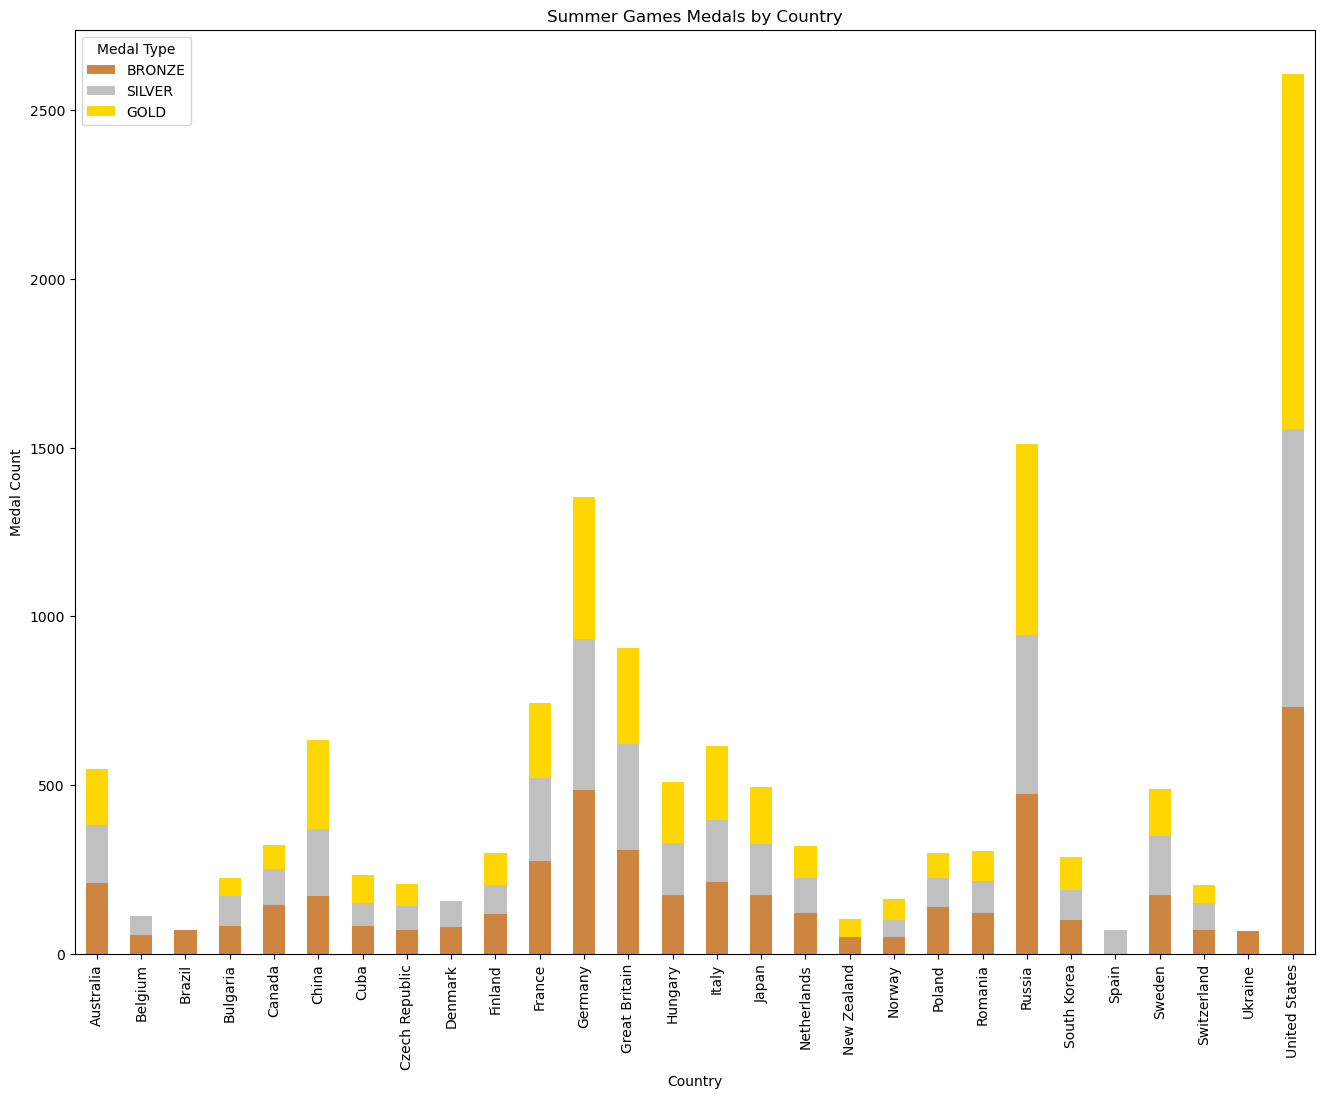

In [13]:
# Create pivot table with country as rows and medal type as columns
df_pivot = country_medal.pivot(index='country_name', columns='medal_type', values='total_number') 
# Reorder columns
df_pivot = df_pivot[['BRONZE', 'SILVER', 'GOLD']]
# Plot stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, color=['peru', 'silver', 'gold'], figsize=(16, 12))
plt.title('Summer Games Medals by Country')
plt.legend(title='Medal Type')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()
#df1.head()

### Summer Medals Heat Map: USA 
This needs work.

,1896,1900,1904,1908,1912,1920,1924,1928,1932,1936,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,Total
discipline_title,,,,,,,,,,,,,,,,,,,,,
3x3 Basketball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Archery,NaN,NaN,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,2.0,2.0,NaN,NaN,1.0,2.0,NaN,33.0
Artistic Gymnastics,NaN,NaN,27.0,NaN,NaN,NaN,1.0,NaN,16.0,NaN,...,1.0,6.0,5.0,1.0,9.0,10.0,6.0,12.0,6.0,118.0
Artistic Swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,9.0
Athletics,16.0,39.0,64.0,33.0,41.0,29.0,32.0,25.0,35.0,25.0,...,26.0,30.0,23.0,16.0,25.0,25.0,28.0,32.0,26.0,821.0


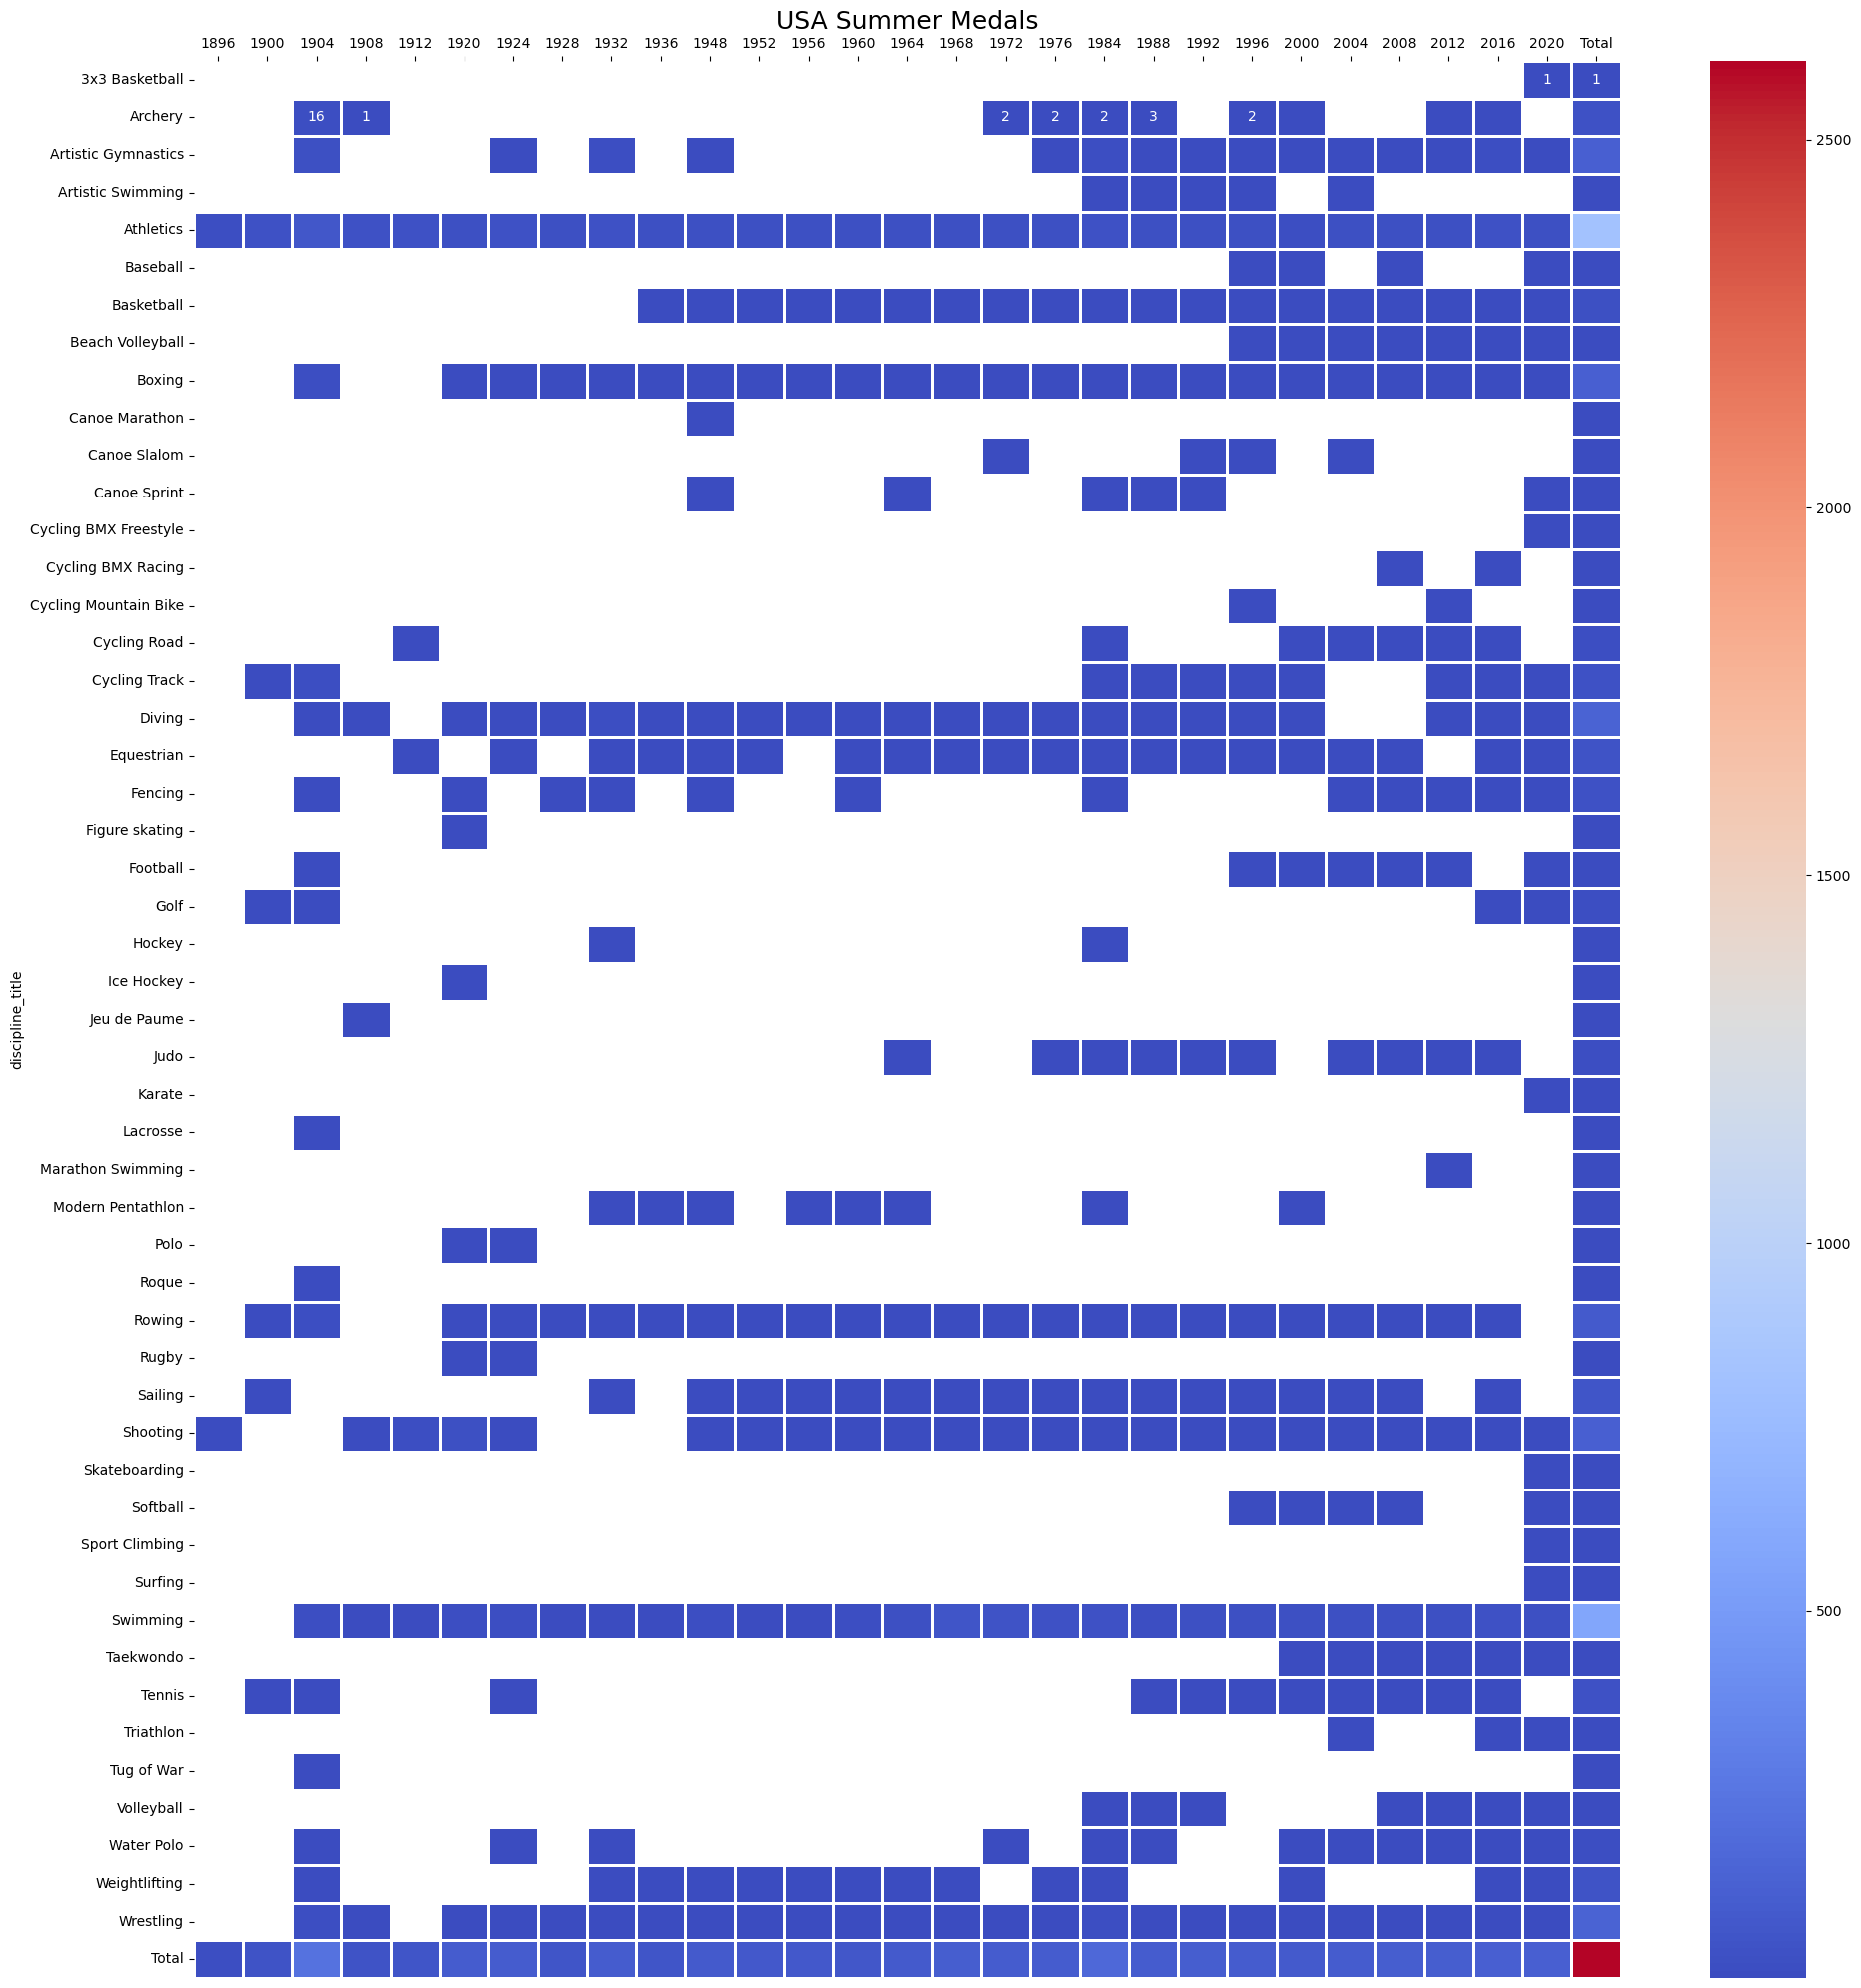

In [14]:
country_medal_usa = ogm.get_country_medal_heatmap(data_summer, 'United States')
display(country_medal_usa.head())
fig1 = ogm.plot_country_medal_heatmap(country_medal_usa, "USA", season="Summer", figsize=(20, 20))


### Summer Medals Heat Map: Ukraine

,Atlanta\n1996,Sydney\n2000,Athens\n2004,Beijing\n2008,London\n2012,Rio\n2016,Tokyo\n2020,Total
discipline_title,,,,,,,,
Tennis,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
Trampoline Gymnastics,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
Weightlifting,2.0,NaN,2.0,NaN,1.0,NaN,NaN,5.0
Wrestling,4.0,2.0,2.0,4.0,1.0,1.0,4.0,18.0
Total,23.0,23.0,22.0,22.0,19.0,11.0,19.0,139.0


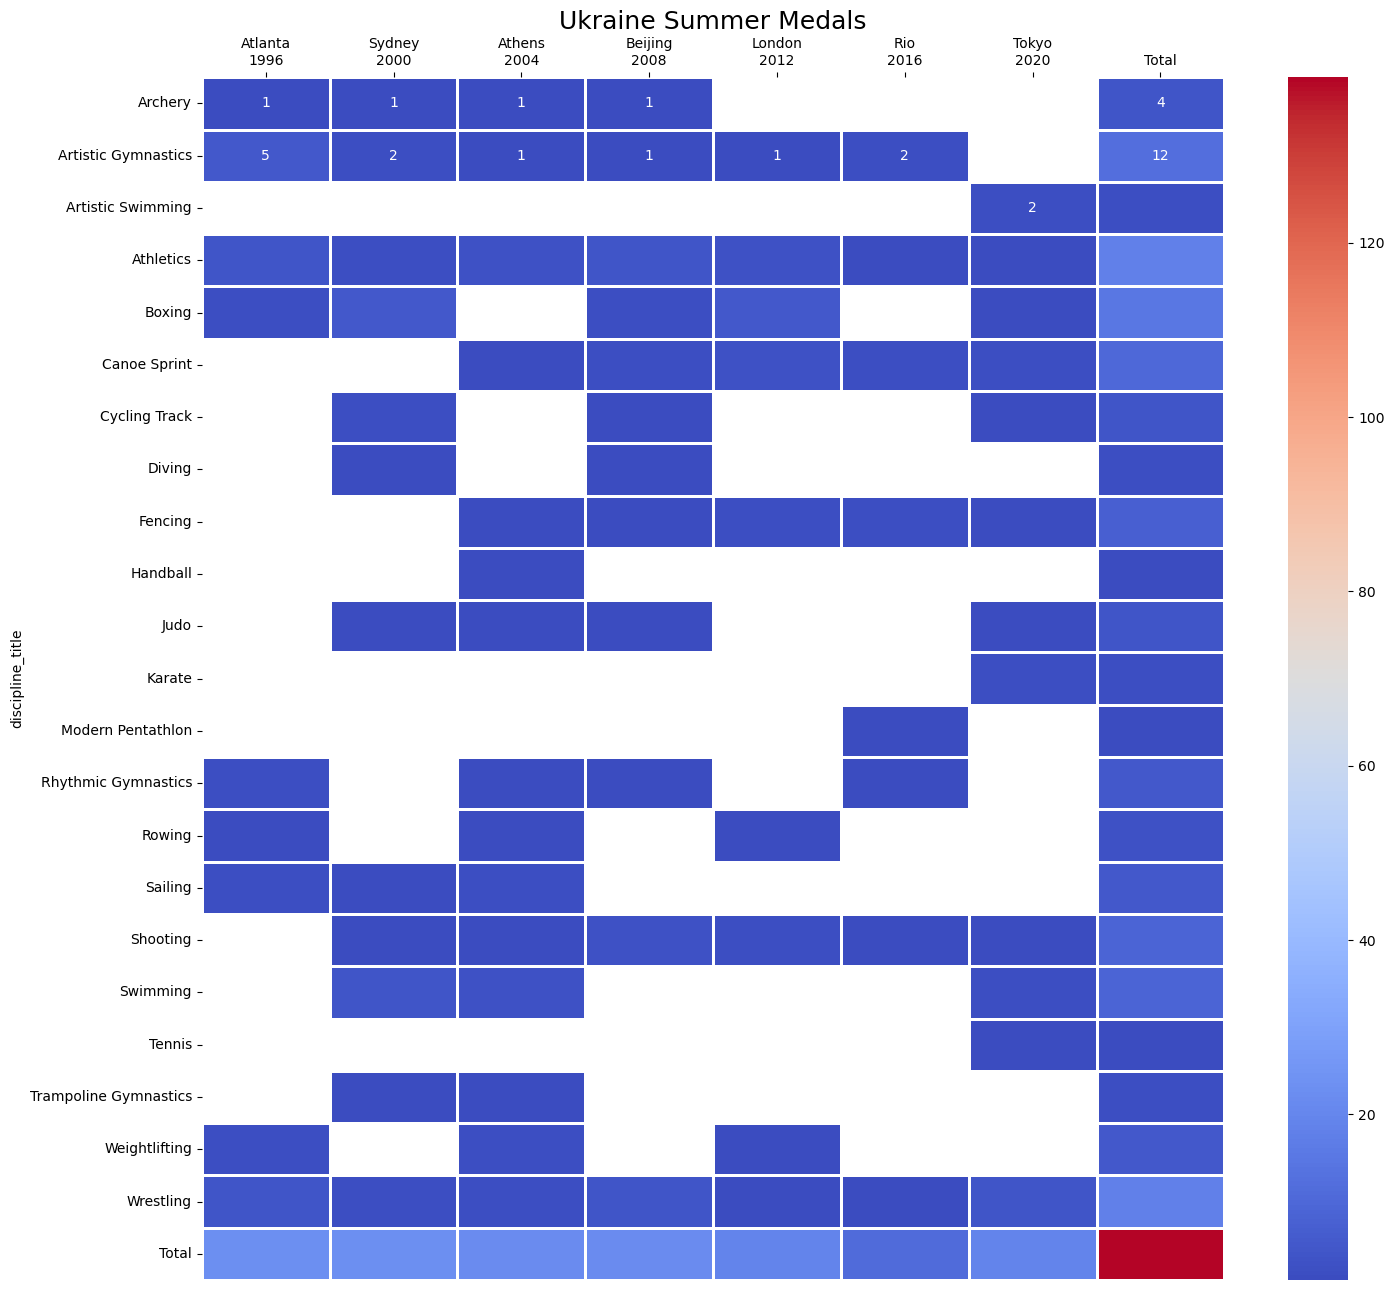

In [15]:
country_medal_ua = ogm.get_country_medal_heatmap(data_summer, 'Ukraine')
display(country_medal_ua.tail())
fig1 = ogm.plot_country_medal_heatmap(country_medal_ua, "Ukraine", season="Summer", figsize=(15, 13))

## Winter Games

In [16]:
data_winter = data_medal[data_medal['game_season']=='Winter'].reset_index(drop=True)
#data_winter.drop(['game_season'], axis=1, inplace=True)
data_winter.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,country_name,country_3_letter_code,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,ITA,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,NOR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,SWE,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,GBR,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,JPN,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


### Winter Medal Counts by Country

In [17]:
# Group by country and medal type and count number of medals by type
country_medal_winter = data_winter.groupby(['country_name', 'medal_type'])\
                               ['participant_type'].count()\
                               .reset_index()\
                               .rename(columns={'participant_type':'total_number'})

# Sort the data and retrieve top 25 (multiples of 3)
country_medal_winter = country_medal_winter.sort_values('total_number', ascending=False)[:120]
country_medal_winter.head()

,country_name,medal_type,total_number
38,Germany,GOLD,162
39,Germany,SILVER,155
71,Norway,GOLD,147
72,Norway,SILVER,133
81,Russia,GOLD,130


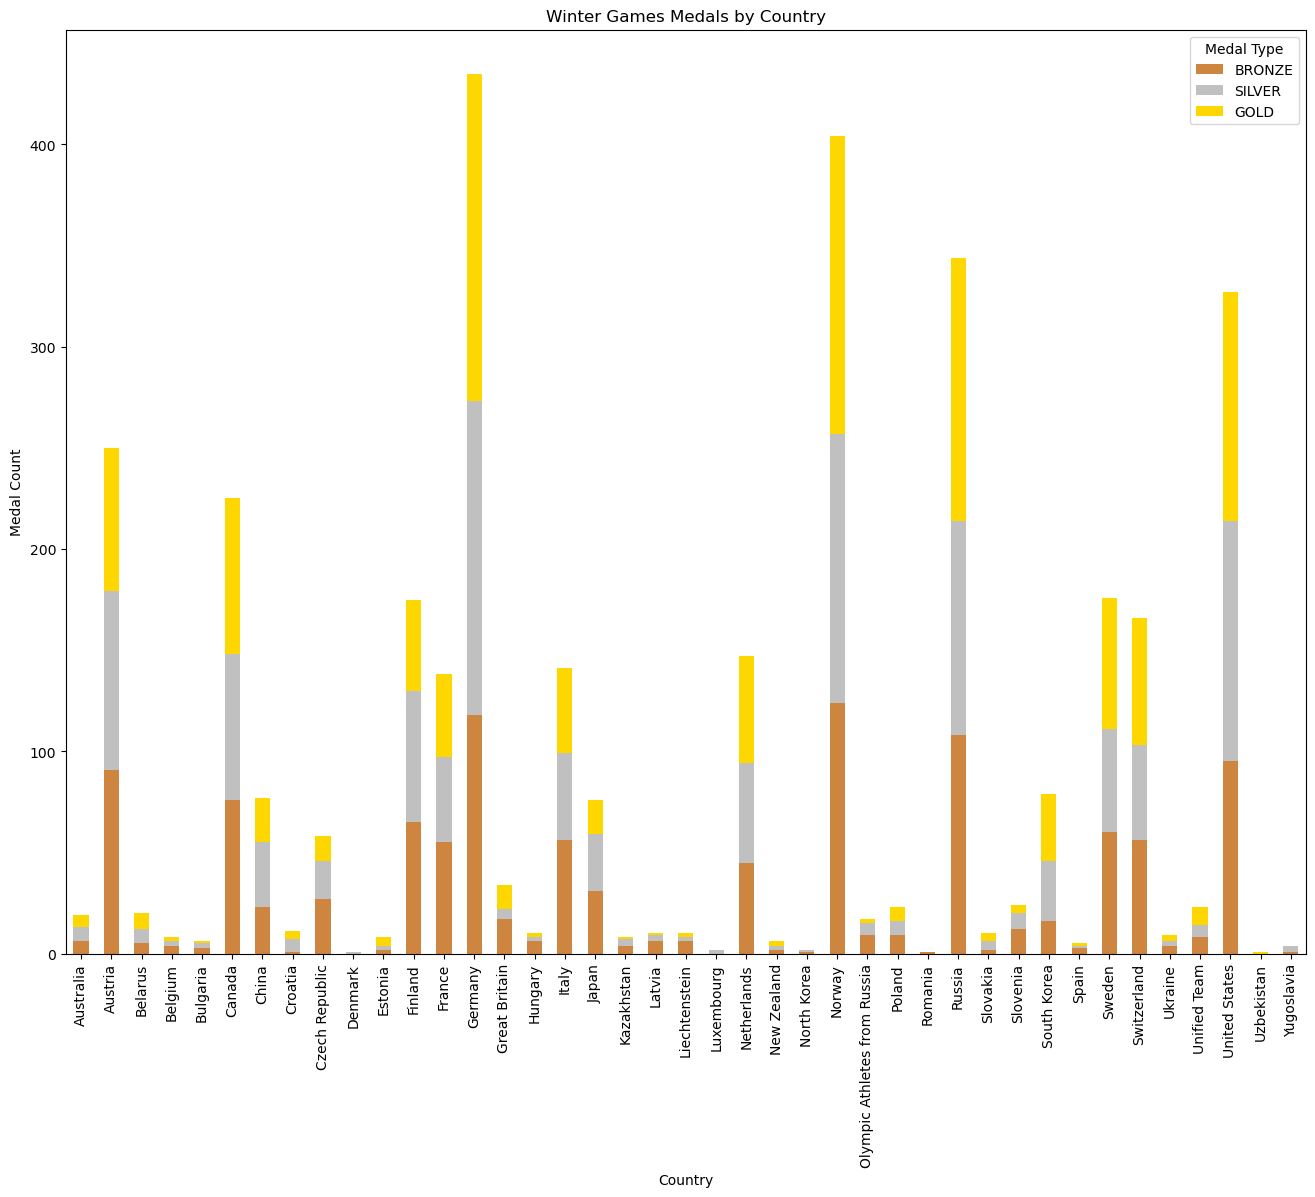

In [18]:
# Create pivot table with country as rows and medal type as columns
df_pivot = country_medal_winter.pivot(index='country_name', columns='medal_type', values='total_number') 
# Reorder columns
df_pivot = df_pivot[['BRONZE', 'SILVER', 'GOLD']]
# Plot stacked bar chart
ax = df_pivot.plot(kind='bar', stacked=True, color=['peru', 'silver', 'gold'], figsize=(16, 12))
plt.title('Winter Games Medals by Country')
plt.legend(title='Medal Type')
plt.xlabel('Country')
plt.ylabel('Medal Count')
plt.show()
#df1.head()

### Medals Heat Map: Norway

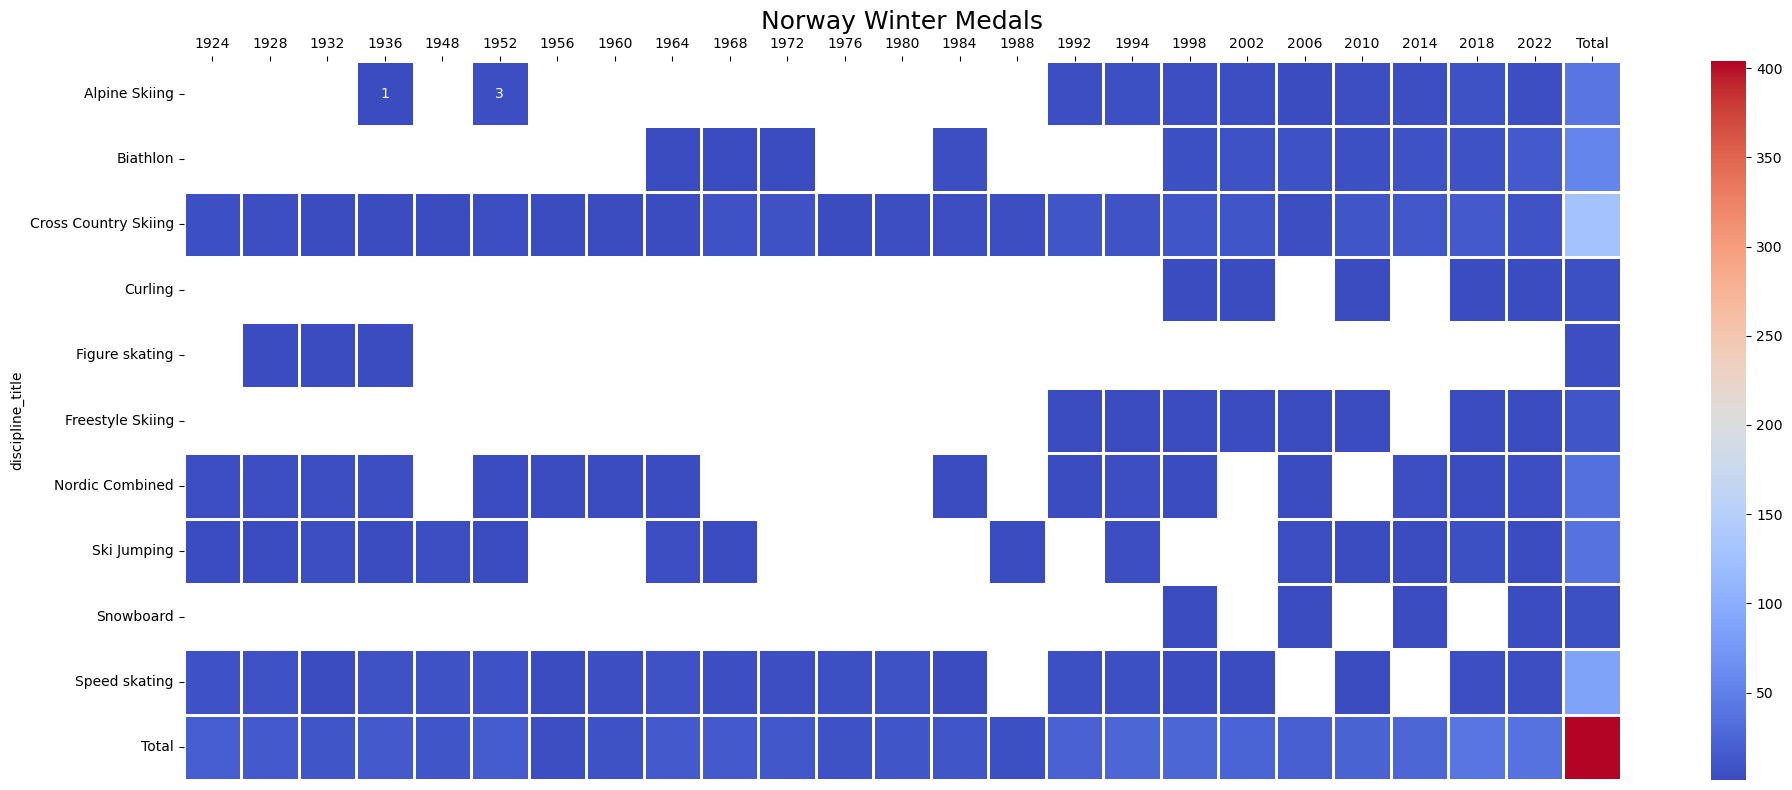

In [19]:
country_medal_nor = ogm.get_country_medal_heatmap(data_winter, 'Norway')
fig1 = ogm.plot_country_medal_heatmap(country_medal_nor, "Norway", season="Winter", figsize=(20,8))


## Disciplines: Tennis

In [ ]:
data_tennis = data_summer[data_summer['discipline_title']=='Tennis']
data_tennis.shape

In [ ]:
data_tennis_women = data_tennis[(data_tennis['event_gender']=='Women')&
                                (data_tennis['participant_type']=='Athlete')&
                                (data_tennis['game_year']>=1988)]

data_tennis_men = data_tennis[(data_tennis['event_gender']=='Men')&
                              (data_tennis['participant_type']=='Athlete')&
                              (data_tennis['game_year']>=1988)]